<a href="https://colab.research.google.com/github/naorJR/IP-Labs/blob/ortra/Lab%205/ex5_pre_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Mount to your drive by the left menu or by running this cell
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2. Change Directory to file location in the drive
%cd '/content/drive/My Drive/IP Labs/5'


/content/drive/My Drive/IP Labs/5


In [ ]:
%matplotlib inline 
import numpy as np
import cv2
import matplotlib.pylab as plt
from skimage import transform,io,color,img_as_ubyte
from sklearn import cluster
from skimage.transform import resize,rescale,rotate
from sklearn.utils import shuffle
from skimage.util import img_as_float32
from numpy import fft
from numpy import random

# Preliminary Report - Question 2

Image shape:(576, 787), Image data type:uint8


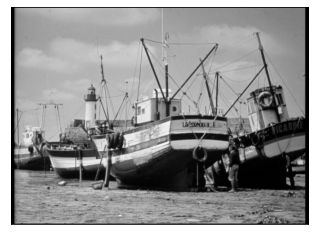

In [ ]:
img = color.rgb2gray(io.imread('BoatsColor.jpg'))
img = img_as_ubyte(img)
print ('Image shape:{}, Image data type:{}'.format(img.shape,img.dtype))
plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X & Y axis
plt.show()


In [ ]:
def brute_saltpaper(img, p):
  w, h = img.shape
  # create the base for base for the noisy image
  noised_img = img
  rand_img = np.random.rand(w,h)
  # create the salt and paper noise
  noised_img = np.where(rand_img < p/2, 0, noised_img)
  noised_img = np.where(rand_img > 1-p/2, 255, noised_img)
  # return the noisy image
  return noised_img

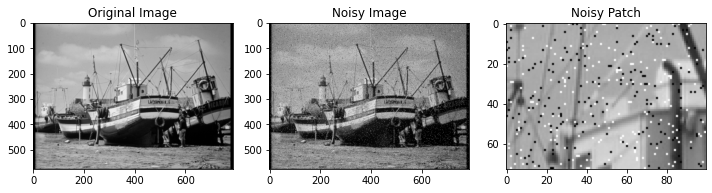

In [ ]:
noisy_image = brute_saltpaper(img, 0.05)
noisy_patch = noisy_image[200:273, 300:400]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax = ax.ravel()

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(noisy_image, cmap='gray')
ax[1].set_title('Noisy Image')
ax[2].imshow(noisy_patch, cmap='gray')
ax[2].set_title('Noisy Patch')

plt.tight_layout()
plt.show()

# Preliminary Report - Question 7

Image shape:(576, 787), Image data type:float64



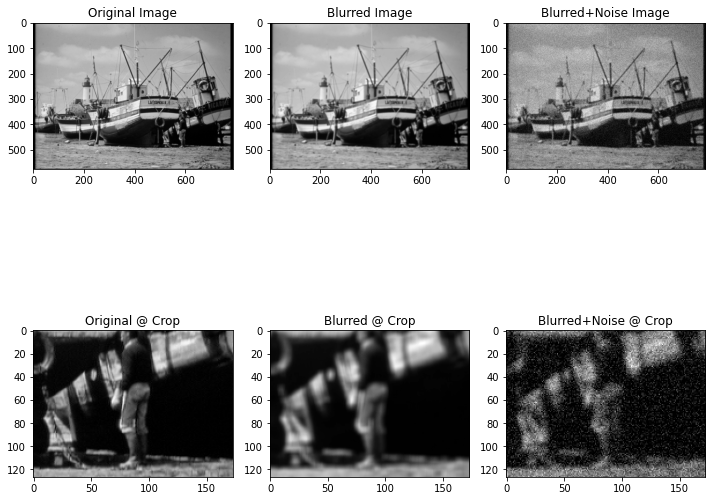

In [ ]:
from skimage.util import random_noise
from skimage.util.dtype import img_as_float64

img64f = color.rgb2gray(io.imread('BoatsColor.jpg'))
img64f = img_as_float64(img64f)
print ('Image shape:{}, Image data type:{}\n'.format(img64f.shape,img64f.dtype))

k_avg_filter = np.ones((5,5))/ 25

img64f_blurred = cv2.filter2D(img64f, -1, k_avg_filter)
img64f_noisy = random_noise(img64f, mode='gaussian', var=0.01)
img64f_blurred_noisy = random_noise(img64f_blurred, mode='gaussian', var=0.01)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
ax = ax.ravel()

img64f = img_as_ubyte(img64f)
img64f_blurred = img_as_ubyte(img64f_blurred)
img64f_noisy = img_as_ubyte(img64f_noisy)
img64f_blurred_noisy = img_as_ubyte(img64f_blurred_noisy)

ax[0].imshow(img64f, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(img64f_blurred, cmap='gray')
ax[1].set_title('Blurred Image')
ax[2].imshow(img64f_blurred_noisy, cmap='gray')
ax[2].set_title('Blurred+Noise Image')
ax[3].imshow(img64f[373:500, 500:673], cmap='gray')
ax[3].set_title('Original @ Crop')
ax[4].imshow(img64f_blurred[373:500, 500:673], cmap='gray')
ax[4].set_title('Blurred @ Crop')
ax[5].imshow(img64f_blurred_noisy[373:500, 500:673], cmap='gray')
ax[5].set_title('Blurred+Noise @ Crop')

plt.tight_layout()
plt.show()

In [ ]:
np.max(img64f_blurred)

21.667794117647063